In [1]:
#Carga de librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as mode

In [3]:
#Carga de archivo CSV
data= pd.read_csv("airbnb.csv", encoding= 'ISO-8859-1')
data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,8.266910e+05,Suite 7 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,850.0,180.0,18.0,11/05/2019,0.17,6.0,325.0,0.0
1,3.579700e+04,Villa Dante,153786,Dici,NaN,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,4056.0,1.0,0.0,NaN,NaN,1.0,363.0,0.0
2,5.239058e+07,"Casa en privada con vigilancia, estacionamiento.",424060909,Maria Carmen Marta,NaN,Cuajimalpa de Morelos,19.395126,-99.277374,Private room,752.0,1.0,0.0,NaN,NaN,1.0,365.0,0.0
3,8.267600e+05,Suite 12 - Suites Condesa Mexico,4326326,Rodrigo,NaN,CuauhtÃ©moc,19.409150,-99.173210,Entire home/apt,971.0,4.0,17.0,15/03/2020,0.15,6.0,203.0,0.0
4,4.461600e+04,CONDESA HAUS B&B,196253,Condesa Haus Bed & Breakfast CDMX,NaN,CuauhtÃ©moc,19.411620,-99.177940,Entire home/apt,18000.0,1.0,56.0,05/06/2022,0.43,11.0,347.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21664,6.180000e+17,CÃ³modo Departamento en Satelite-Echegaray con...,442065952,Ricardo,NaN,Azcapotzalco,19.499980,-99.226010,Entire home/apt,673.0,1.0,3.0,29/05/2022,2.73,79.0,NaN,3.0
21665,2.210710e+07,GREAT & cozy flat in Satelite,387195495,Daniela,NaN,Azcapotzalco,119.507870,-99.220670,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0
21666,4.061781e+07,Blanca,96471106,Mary Carmen,NaN,Azcapotzalco,19.507530,-99.225060,Entire home/apt,230.0,1.0,5.0,31/12/2019,0.16,4.0,140.0,0.0
21667,5.700000e+17,Casa LimÃ³n. Confort y seguridad,30446640,Ericka,NaN,Azcapotzalco,19.493360,-99.229090,Entire home/apt,690.0,3.0,0.0,NaN,NaN,1.0,354.0,0.0


In [ ]:
#Identificación de valores nulos
null=data.isnull(). sum()
null

In [5]:
data2= data.copy()

3. APLICAR LOS SIGUIENTES MÉTODOS PARA REEMPLAZAR VALORES NULOS EN CADA COLUMNA:

In [6]:
#“host_name”: Rellenar con el objeto "anterior" de la columna
data2["host_name"]= data2["host_name"].fillna(method='bfill')

#“neighbourhood”: Rellenar con el objeto "posterior" de la columna
data2["neighbourhood"]= data2["neighbourhood"].fillna(method='ffill')

#“neighbourhood”: Rellenar con el objeto "posterior" de la columna
data2["neighbourhood_group"]= data2["neighbourhood_group"].fillna('Desconocido')

#“latitude”: Rellenar con el valor de “Media” de la columna
data2["latitude"]=data2["latitude"].fillna(round(data2["latitude"].mean(),1))

#“longitude”: Rellenar con el valor de “Mediana” de la columna
data2["longitude"]=data2["longitude"].fillna(round(data2["longitude"].median(),1))

#“room_type”: Rellenar con el string “Private room”
data2['room_type']=data2['room_type'].fillna('Private room')

#“price”: Rellenar con el valor de “Media” de la columna
data2["price"]=data2["price"].fillna(round(data2["price"].mean(),1))

#“minimum_nights”: Rellenar con el valor de “1”
data2['minimum_nights']=data2['minimum_nights'].fillna(1)

#"number_of_reviews": Rellenar con el valor de “0”
data2['number_of_reviews']=data2['number_of_reviews'].fillna(0)

#"last_review":Rellenar con el objeto "31/12/2022" de la columna
data2["last_review"]=data2["last_review"].fillna('31/12/2022')

#"reviews_per_month": Rellenar con el valor de “Media” de la columna
data2["reviews_per_month"]=data2["reviews_per_month"].fillna(round(data2["reviews_per_month"].mean(),1))

#"calculated_host_listings_count": Rellenar con el valor de “1”
data2['calculated_host_listings_count']=data2['calculated_host_listings_count'].fillna(1)

#"availability_365" y "number of reviews ltm": Rellenar con el objeto "anterior" de cada columna, respectivamente.
data2["availability_365"]= data2["availability_365"].fillna(method='bfill')

data2["number_of_reviews_ltm"]= data2["number_of_reviews_ltm"].fillna(method='bfill')

In [ ]:
#Identificación de valores nulos
null=data2.isnull(). sum()
null

4. APLICAR MÉTODO DE DISTRIBUCIÓN NORMAL PARA IDENTIFICAR OUTLIERS, TOMANDO COMO LÍMITES 3 DESVIACIONES ESTÁNDAR, EXCULSIVAMENTE PARA LAS COLUMNAS 'latitude', 'longitude', 'price', 'minimum_nigths', 'number_of_reviews', 'reviews_per month' Y 'availability_365'.
OBTENER LOS DIAGRAMAS DE CAJA DE CAJA COLUMNA RESPECTIVAMENTE.

In [8]:
#Creación de una copia para la base de datos
copia = data2.copy()

LATITUDE

In [9]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna “latitude"
reto2=copia["latitude"]
limitesuperior=reto2.mean()+3*reto2.std()
limiteinferior=reto2.mean()-3*reto2.std()
print("Limite superior permitido",limitesuperior)
print("Limite inferior permitido",limiteinferior)

Limite superior permitido 22.0250088466136
Limite inferior permitido 16.795011725586317


In [10]:
#Identificación de Outliers
outliers_latitude= copia [(reto2>limitesuperior) | (reto2<limiteinferior)]
outliers_latitude

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
12741,46757982.0,Residencia Master Suite con Terraza,375169008,Residencias,Desconocido,Benito JuÃ¡rez,99.39291,-99.17623,Entire home/apt,3678.0,2.0,0.0,31/12/2022,1.60,25.0,337.0,0.0
21665,22107097.0,GREAT & cozy flat in Satelite,387195495,Daniela,Desconocido,Azcapotzalco,119.50787,-99.22067,Entire home/apt,897.0,2.0,107.0,07/02/2022,1.97,11.0,314.0,17.0


In [ ]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["latitude"]) 
plt.title("Outliers de latitude")
plt.show() #diagrama para visualizar outliers

LONGITUDE

In [12]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "longitude"
r3=copia["longitude"]
limitesuperior2=r3.mean()+3*r3.std()
limiteinferior2=r3.mean()-3*r3.std()
print("Limite superior permitido",limitesuperior2)
print("Limite inferior permitido",limiteinferior2)

Limite superior permitido -89.00097389354517
Limite inferior permitido -109.32865504999904


In [ ]:
#Identificación de Outliers
outliers_longitude= copia [(r3>limitesuperior2) | (r3<limiteinferior2)]
outliers_longitude


In [ ]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["longitude"]) 
plt.title("Outliers de longitude")
plt.show() #diagrama para visualizar outliers

PRICE

In [15]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "price"
r4=copia["price"]
limitesuperior3=r4.mean()+4*r4.std()
limiteinferior3=r4.mean()-4*r4.std()
print("Limite superior permitido",limitesuperior3)
print("Limite inferior permitido",limiteinferior3)

Limite superior permitido 34057.78312578311
Limite inferior permitido -31156.8169990583


In [ ]:
#Identificación de Outliers
outliers_price= copia [(r4>limitesuperior3) | (r4<limiteinferior3)]
outliers_price

In [ ]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["price"]) 
plt.title("Outliers de price")
plt.show() #diagrama para visualizar outliers

MINIMUM NIGHTS

In [18]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "minimum_nights"
r5=copia["minimum_nights"]
limitesuperior4=r5.mean()+4*r5.std()
limiteinferior4=r5.mean()-4*r5.std()
print("Limite superior permitido",limitesuperior4)
print("Limite inferior permitido",limiteinferior4)

Limite superior permitido 112.09524573978166
Limite inferior permitido -102.41265771080018


In [ ]:
#Identificación de Outliers
outliers_minimum_n= copia [(r5>limitesuperior4) | (r5<limiteinferior4)]
outliers_minimum_n

In [ ]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["minimum_nights"]) 
plt.title("Outliers de minimum_nights")
plt.show() #diagrama para visualizar outliers

NUMBER OF REVIEWS

In [21]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "number_of_reviews"
r6=copia["number_of_reviews"]
limitesuperior5=r6.mean()+4*r6.std()
limiteinferior5=r6.mean()-4*r6.std()
print("Limite superior permitido",limitesuperior5)
print("Limite inferior permitido",limiteinferior5)

Limite superior permitido 256.32320597118996
Limite inferior permitido -193.08696987353892


In [ ]:
#Identificación de Outliers
outliers_number_reviews= copia [(r6>limitesuperior5) | (r6<limiteinferior5)]
outliers_number_reviews

In [ ]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["number_of_reviews"]) 
plt.title("Outliers de number_of_reviews")
plt.show() #diagrama para visualizar outliers


REVIEWS PER MONTH

In [24]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "reviews_per_month"
r7=copia["reviews_per_month"]
limitesuperior6=r7.mean()+4*r7.std()
limiteinferior6=r7.mean()-4*r7.std()
print("Limite superior permitido",limitesuperior6)
print("Limite inferior permitido",limiteinferior6)

Limite superior permitido 8.868489109921253
Limite inferior permitido -5.691280193958356


In [ ]:
#Identificación de Outliers
outliers_reviews_month= copia [(r7>limitesuperior6) | (r7<limiteinferior6)]
outliers_reviews_month

In [ ]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["reviews_per_month"]) 
plt.title("Outliers de reviews_per_month")
plt.show() #diagrama para visualizar outliers

AVAILABILITY 365

In [27]:
#Aplicar método de distribución normal para identificar Outliers, tomando como límites 3
#desviaciones estándar, exclusivamente para la columna "availability_365"
r8=copia["availability_365"]
limitesuperior7=r8.mean()+3*r8.std()
limiteinferior7=r8.mean()-3*r8.std()
print("Limite superior permitido",limitesuperior7)
print("Limite inferior permitido",limiteinferior7)

Limite superior permitido 612.4014586334399
Limite inferior permitido -125.45042259116755


In [28]:
#Identificación de Outliers
outliers_reviews_month= copia [(r8>limitesuperior7) | (r8<limiteinferior7)]
outliers_reviews_month

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
15,2056638.0,Amplio y luminoso loft en CoyoacÃ¡n,10531228,Maria,Desconocido,CoyoacÃ¡n,19.35353,-99.16299,Entire home/apt,1602.0,1.0,21.0,24/06/2018,0.2,3.0,1290.0,0.0


In [ ]:
#Diagrama de caja: latitude.
fig1 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["availability_365"]) 
plt.title("Outliers de availability_365")
plt.show() #diagrama para visualizar outliers

5. APLICAR MÉTODO DE RANGO INTERCUARTÍLICO PARA IDENTIFICAR OUTLIERS, TOMANDO COMO LÍMITES 1.5 IQR, PARA LAS MISMAS COLUMNAS REALIZAR UN ANÁLISI COMPARATIVO DE AMBOS RESULTADOS.

In [37]:
#copia2 para rango intercuartílico
copia2=copia.copy()

LATITUDE

In [40]:
#Variable: latitude.

x2=copia2["latitude"]

p25x2=x2.quantile(0.25) #Q1
p75x2=x2.quantile(0.75) #Q3
iqrx2 = p75x2 - p25x2 #Q3-Q1

LimiteSuperior_iqr_2 = p75x2 + 1.7*iqrx2
LimiteInferior_iqr_2 = p25x2 - 1.7*iqrx2
print("Limite superior permitido", LimiteSuperior_iqr_2)
print("Limite inferior permitido", LimiteInferior_iqr_2)

Limite superior permitido 19.518043000000006
Limite inferior permitido 19.293686999999995


In [41]:
#Identificación de Outliers
otlrs_latitude_iqr= copia2 [(x2>LimiteSuperior_iqr_2) | (x2<LimiteInferior_iqr_2)]
otlrs_latitude_iqr

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
96,329776.0,HabitaciÃ³n Verde.,1683373,Miguel,Desconocido,Tlalpan,19.27510,-99.17757,Private room,303.0,2.0,16.0,25/12/2021,0.27,5.0,0.0,1.0
194,609594.0,House in Xochimilco,2223274,Luis,Desconocido,Xochimilco,19.26541,-99.11365,Entire home/apt,608.0,21.0,12.0,06/10/2020,0.14,1.0,325.0,0.0
206,1920070.0,Mountain Oasis surrender by trees,9953466,Gabriela,Desconocido,Tlalpan,19.24444,-99.17044,Private room,417.0,1.0,3.0,27/10/2019,0.05,1.0,365.0,0.0
213,1945351.0,"Private room. Near COLMEX, UPN, FLACSO",340030,Griselda,Desconocido,Tlalpan,19.28356,-99.21837,Private room,608.0,3.0,2.0,26/01/2018,0.04,3.0,365.0,0.0
305,4519487.0,Recamara con entrada independiente,6604619,Tania,Desconocido,Tlalpan,19.26894,-99.17053,Private room,428.0,6.0,6.0,30/04/2021,0.08,2.0,365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,47965554.0,Casa RAUL CRUZ,386639818,Raul,Desconocido,Azcapotzalco,19.52080,-99.21918,Entire home/apt,250.0,1.0,0.0,31/12/2022,1.60,1.0,356.0,0.0
21633,52621697.0,Departamento nuevo y reciÃ©n amueblado enfrent...,21515326,Roberto,Desconocido,Azcapotzalco,19.52240,-99.22512,Entire home/apt,1000.0,1.0,32.0,29/04/2022,3.76,2.0,358.0,32.0
21636,38257741.0,"Hospedaje Para 2 personas, en recamara privada.",215690013,David,Desconocido,Azcapotzalco,19.52869,-99.22087,Entire home/apt,432.0,2.0,4.0,26/11/2021,0.12,5.0,364.0,2.0
21638,52622073.0,Departamento Viveros del Lago.\nEnfrente de la...,21515326,Roberto,Desconocido,Azcapotzalco,19.52295,-99.22571,Entire home/apt,1000.0,1.0,25.0,05/06/2022,2.92,2.0,334.0,25.0


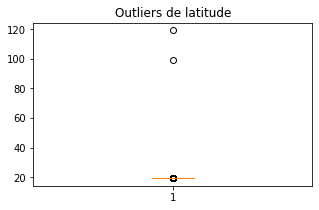

In [39]:
#Diagrama de caja: latitude.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia2["latitude"]) 
plt.title("Outliers de latitude")
plt.show() #diagrama para visualizar outliers

In [ ]:
#Convertir los outliers en NA's
data3=copia[(x7<=LimiteSuperior7)&(x7>=LimiteInferior7)]
data3

In [ ]:
#"gnp_old": sustituirlos por el promedio de la columna
copia["gnp_old"]=data3["gnp_old"].fillna(round(copia["gnp_old"].mean(),0))
copia

LONGITUDE

In [ ]:
#Variable: latitude.

x3=copia["latitude"]

p25x3=x3.quantile(0.25) #Q1
p75x3=x3.quantile(0.75) #Q3
iqrx3 = p75x3 - p25x3 #Q3-Q1

LimiteSuperior_iqr_3 = p75x3 + 1.5*iqrx3
LimiteInferior_iqr_3 = p25x3 - 1.5*iqrx3
print("Limite superior permitido", LimiteSuperior_iqr_3)
print("Limite inferior permitido", LimiteInferior_iqr_3)

In [ ]:
#Identificación de Outliers
otlrs_longitude_iqr= copia [(x3>LimiteSuperior_iqr_3) | (x3<LimiteInferior_iqr_3)]
otlrs_longitude_iqr

In [ ]:
#Diagrama de caja: longitude.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["longitude"]) 
plt.title("Outliers de longitude")
plt.show() #diagrama para visualizar outliers

PRICE

In [ ]:
#Variable: price.

x4=copia["price"]

p25x4=x4.quantile(0.25) #Q1
p75x4=x4.quantile(0.75) #Q3
iqrx4 = p75x4 - p25x4 #Q3-Q1

LimiteSuperior_iqr_4 = p75x4 + 1.5*iqrx4
LimiteInferior_iqr_4 = p25x4 - 1.5*iqrx4
print("Limite superior permitido", LimiteSuperior_iqr_4)
print("Limite inferior permitido", LimiteInferior_iqr_4)

In [ ]:
#Identificación de Outliers
otlrs_price_iqr= copia [(x4>LimiteSuperior_iqr_4) | (x4<LimiteInferior_iqr_4)]
otlrs_price_iqr

In [ ]:
#Diagrama de caja: price.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["price"]) 
plt.title("Outliers de price")
plt.show() #diagrama para visualizar outliers

MINIMUM NIGHTS

In [ ]:
#Variable: minimum nigths.

x5=copia["minimum_nigths"]

p25x5=x5.quantile(0.25) #Q1
p75x5=x5.quantile(0.75) #Q3
iqrx5 = p75x5 - p25x5 #Q3-Q1

LimiteSuperior_iqr_5 = p75x5 + 1.5*iqrx5
LimiteInferior_iqr_5 = p25x5 - 1.5*iqrx5
print("Limite superior permitido", LimiteSuperior_iqr_5)
print("Limite inferior permitido", LimiteInferior_iqr_5)

In [ ]:
#Identificación de Outliers
otlrs_minimum_n_iqr= copia [(x5>LimiteSuperior_iqr_5) | (x5<LimiteInferior_iqr_5)]
otlrs_minimum_n_iqr

In [ ]:
#Diagrama de caja: minimum_nigths.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["minimum_nigths"]) 
plt.title("Outliers de minimum_nigths")
plt.show() #diagrama para visualizar outliers

NUMBER OF REVIEWS

In [ ]:
#Variable: number_of_reviews.

x6=copia["number_of_reviews"]

p25x6=x6.quantile(0.25) #Q1
p75x6=x6.quantile(0.75) #Q3
iqrx6 = p75x6 - p25x6 #Q3-Q1

LimiteSuperior_iqr_6 = p75x6 + 1.5*iqrx6
LimiteInferior_iqr_6 = p25x6 - 1.5*iqrx6
print("Limite superior permitido", LimiteSuperior_iqr_6)
print("Limite inferior permitido", LimiteInferior_iqr_6)

In [ ]:
#Identificación de Outliers
otlrs_number_of_reviews_iqr= copia [(x6>LimiteSuperior_iqr_6) | (x6<LimiteInferior_iqr_6)]
otlrs_number_of_reviews_iqr

In [ ]:
#Diagrama de caja: number_of_reviews.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["number_of_reviews"]) 
plt.title("Outliers de number_of_reviews")
plt.show() #diagrama para visualizar outliers

REVIEWS PER MONTH

In [ ]:
#Variable: reviews_per_month.

x7=copia["reviews_per_month"]

p25x7=x7.quantile(0.25) #Q1
p75x7=x7.quantile(0.75) #Q3
iqrx7 = p75x7 - p25x7 #Q3-Q1

LimiteSuperior_iqr_7 = p75x7 + 1.5*iqrx7
LimiteInferior_iqr_7 = p25x7 - 1.5*iqrx7
print("Limite superior permitido", LimiteSuperior_iqr_7)
print("Limite inferior permitido", LimiteInferior_iqr_7)

In [ ]:
#Identificación de Outliers
otlrs_reviews_per_month_iqr= copia [(x7>LimiteSuperior_iqr_7) | (x7<LimiteInferior_iqr_7)]
otlrs_reviews_per_month_iqr

In [ ]:
#Diagrama de caja: reviews_per_month.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["reviews_per_month"]) 
plt.title("Outliers de reviews_per_month")
plt.show() #diagrama para visualizar outliers

AVAILABILITY 365

In [ ]:
#Variable: availability_365.
x8=copia["availability_365"]

p25x8=x8.quantile(0.25) #Q1
p75x8=x8.quantile(0.75) #Q3
iqrx8 = p75x8 - p25x8 #Q3-Q1

LimiteSuperior_iqr_8 = p75x8 + 1.5*iqrx8
LimiteInferior_iqr_8 = p25x8 - 1.5*iqrx8
print("Limite superior permitido", LimiteSuperior_iqr_7)
print("Limite inferior permitido", LimiteInferior_iqr_7)

In [ ]:
#Identificación de Outliers
otlrs_availability_365_iqr= copia [(x8>LimiteSuperior_iqr_8) | (x8<LimiteInferior_iqr_8)]
otlrs_availability_365_iqr

In [ ]:
#Diagrama de caja: availability_365.
fig3 = plt.figure(figsize =(5, 3))
plt.boxplot(copia["availability_365"]) 
plt.title("Outliers de availability_365")
plt.show() #diagrama para visualizar outliers